In [1]:

!apt install libgraphviz-dev
!pip install pygraphviz
!pip install -r requirements.txt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [2]:
!python test_scratch_grad.py

.......................
----------------------------------------------------------------------
Ran 23 tests in 0.017s

OK


In [3]:
#Chargement des librairies utilisées
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
from scratch_grad import Variable

import numpy as np

In [4]:
# Définition des variables de l'énoncé
W1 = Variable(np.array([[1, -1, -2], [-0.6, 0.2, -0.4]]), name="W1")
b1 = Variable(np.array([[0.5], [2.8]]), name="b1")
W2 = Variable(np.array([[0.3, 0.8], [-1.5, -0.8]]), name="W2")
b2 = Variable(np.array([[-0.1], [0.4]]), name="b2")
W3 = Variable(np.array([[-0.5, 1.5]]), name="W3")
b3 = Variable(np.array([0.5]), name="b3")
X = Variable(np.array([[2], [1], [1]]), name="X")
Y = Variable(np.array([1]), name="Y")

# Calcul des valeurs intermédiaires
W1X = W1 @ X
W1X._name = "W1*X"
a1 = W1X + b1
a1._name = "a1"
h1 = a1.relu()
h1._name = "h1"
W2h1 = W2 @ h1
W2h1._name = "W2*h1"
a2 = W2h1 + b2
a2._name = "a2"
h2 = a2.relu()
h2._name = "h2"
W3h2 = W3 @ h2
W3h2._name = "W3*h2"
a3 = W3h2 + b3
a3._name = "a3"
h3 = a3.sigmoid()
h3._name = "h3"

# Calcul de la fonction de perte
loss = (-Y) * h3.log() - (Variable(1) - Y) * (Variable(1) - h3).log()

In [5]:
#Chargement des librairies utilisées
from tabulate import tabulate

# Définition des données à afficher avec explicit string conversion for NumPy arrays
data = [
    ["h3", str(h3.data)],
    ["a3", str(a3.data)],
    ["h2", str(h2.data)],
    ["a2", str(a2.data)],
    ["h1", str(h1.data)],
    ["a1", str(a1.data)]
]

# Définition des enn-têtes
headers = ["Variable", "Valeur"]

# Affichage du tableau
print(tabulate(data, headers=headers, tablefmt="grid"))


+------------+----------------+
| Variable   | Valeur         |
+============+================+
| h3         | [[0.49750002]] |
+------------+----------------+
| a3         | [[-0.01]]      |
+------------+----------------+
| h2         | [[1.02]        |
|            |  [0.  ]]       |
+------------+----------------+
| a2         | [[ 1.02]       |
|            |  [-0.72]]      |
+------------+----------------+
| h1         | [[0. ]         |
|            |  [1.4]]        |
+------------+----------------+
| a1         | [[-0.5]        |
|            |  [ 1.4]]       |
+------------+----------------+


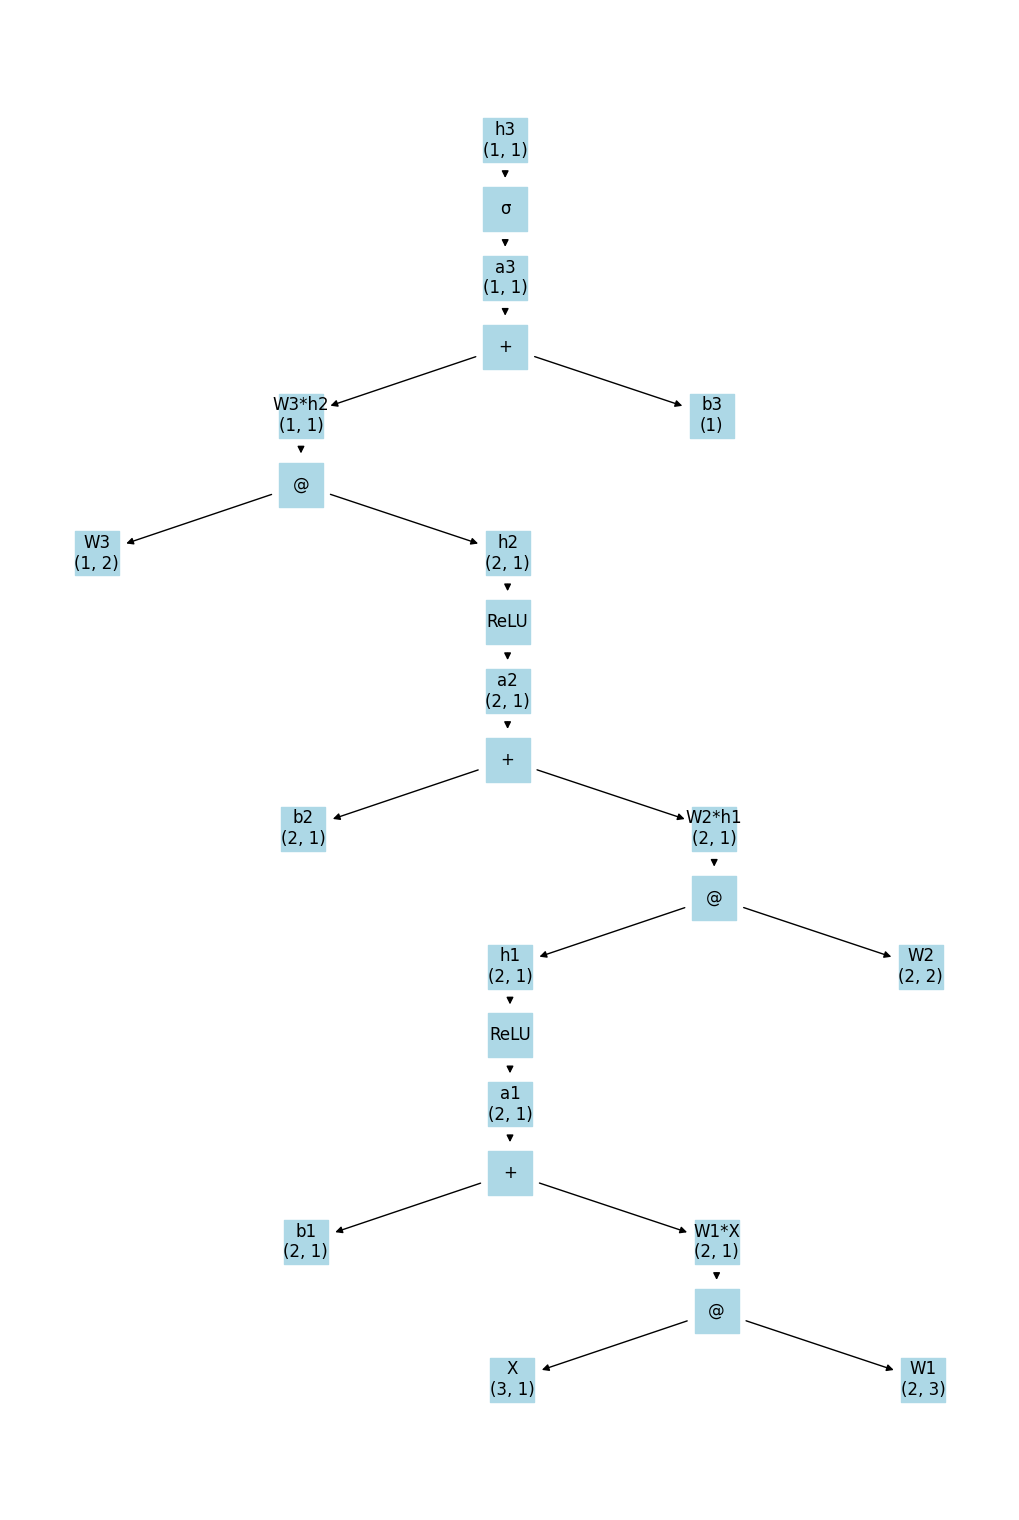

In [6]:
h3.show()

In [7]:
!python train_mnist.py


100% 3750/3750 [01:08<00:00, 54.71it/s]
Epoch 0
	Train:		Loss 2.517932130115426,	Acc 0.10586666666666666
	Validation:	Loss 2.2939111562896786,	Acc 0.03125
Figure(640x480)
100% 3750/3750 [01:06<00:00, 56.59it/s]
Epoch 1
	Train:		Loss 2.3182454018013385,	Acc 0.10853333333333333
	Validation:	Loss 2.281526767445829,	Acc 0.15625
Figure(640x480)
Figure(640x480)
100% 3750/3750 [01:09<00:00, 54.31it/s]
Epoch 2
	Train:		Loss 2.3198409413134677,	Acc 0.09866666666666667
	Validation:	Loss 2.3174075059515906,	Acc 0.09375
Figure(640x480)
Figure(640x480)
100% 3750/3750 [01:07<00:00, 55.94it/s]
Epoch 3
	Train:		Loss 2.3169189088965116,	Acc 0.10533333333333333
	Validation:	Loss 2.318821869543922,	Acc 0.09375
Figure(640x480)
Figure(640x480)
100% 3750/3750 [01:06<00:00, 56.04it/s]
Epoch 4
	Train:		Loss 2.3159733926627424,	Acc 0.10853333333333333
	Validation:	Loss 2.357366572933084,	Acc 0.09375
Figure(640x480)
Figure(640x480)
100% 3750/3750 [01:11<00:00, 52.62it/s]
Epoch 5
	Train:		Loss 2.3170836225698617

In [8]:
import os
from google.colab import files

# Specify the folder you want to download
folder_path = '/content/data'

# Specify the name of the zip file you want to create
zip_name = 'data.zip'

# Compress the folder
!zip -r {zip_name} {folder_path}

# Download the zipped file
files.download(zip_name)

# Optional: Cleanup by removing the zip file after download
#os.remove(zip_name)


  adding: content/data/ (stored 0%)
  adding: content/data/MNIST/ (stored 0%)
  adding: content/data/MNIST/raw/ (stored 0%)
  adding: content/data/MNIST/raw/train-images-idx3-ubyte (deflated 79%)
  adding: content/data/MNIST/raw/t10k-labels-idx1-ubyte (deflated 55%)
  adding: content/data/MNIST/raw/t10k-images-idx3-ubyte.gz (deflated 0%)
  adding: content/data/MNIST/raw/train-images-idx3-ubyte.gz (deflated 0%)
  adding: content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz (stored 0%)
  adding: content/data/MNIST/raw/train-labels-idx1-ubyte (deflated 52%)
  adding: content/data/MNIST/raw/t10k-images-idx3-ubyte (deflated 79%)
  adding: content/data/MNIST/raw/train-labels-idx1-ubyte.gz (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import os
from google.colab import files

# Specify the folder you want to download
folder_path = '/content/results_graphs'

# Specify the name of the zip file you want to create
zip_name = 'results_graphs.zip'

# Compress the folder
!zip -r {zip_name} {folder_path}

# Download the zipped file
files.download(zip_name)

# Optional: Cleanup by removing the zip file after download
#os.remove(zip_name)


  adding: content/results_graphs/ (stored 0%)
  adding: content/results_graphs/epoch_11_graphs.png (deflated 5%)
  adding: content/results_graphs/epoch_7_graphs.png (deflated 5%)
  adding: content/results_graphs/epoch_24_graphs.png (deflated 4%)
  adding: content/results_graphs/computation_graphs/ (stored 0%)
  adding: content/results_graphs/computation_graphs/computation_graph_epoch_15.png (stored 0%)
  adding: content/results_graphs/computation_graphs/computation_graph_epoch_11.png.png (stored 0%)
  adding: content/results_graphs/computation_graphs/computation_graph_epoch_24.png (stored 0%)
  adding: content/results_graphs/computation_graphs/computation_graph_epoch_29.png.png (stored 0%)
  adding: content/results_graphs/computation_graphs/computation_graph_epoch_4.png.png (stored 0%)
  adding: content/results_graphs/computation_graphs/computation_graph_epoch_18.png.png (stored 0%)
  adding: content/results_graphs/computation_graphs/computation_graph_epoch_6.png (stored 0%)
  adding: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

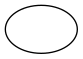

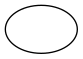

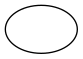

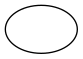

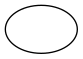

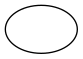

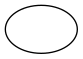

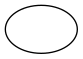

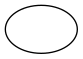

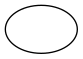

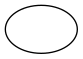

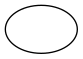

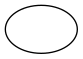

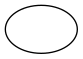

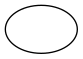

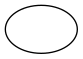

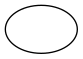

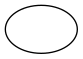

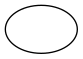

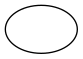

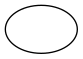

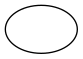

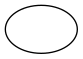

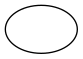

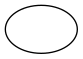

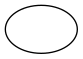

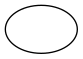

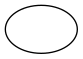

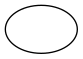

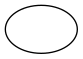

In [11]:
import os
from IPython.display import Image, display

# Set the directory containing your images
image_dir = '/content/results_graphs/computation_graphs'

# List all files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.png')]

# Sort the files to display them in order
image_files.sort()

# Display each image in the directory
for image_file in image_files:
    display(Image(filename=image_file))
